In [2]:
import json, requests, time
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('postgresql://postgres:argmax@pg:5432/postgres')


# Data
Every time a user opens a mobile app, an auction is going on behind the scenes. The highest bidder gets to advertise his ad to the user.
## Auctions Table

In [3]:
sql_query = 'SELECT * FROM auctions;'
with engine.connect() as db_con:
    df = pd.read_sql(sql_query, con=db_con)

df

,id,eventTimestamp,unitDisplayType,brandName,bundleId,countryCode,deviceId,osAndVersion,bidFloorPrice,sentPrice
0,1,1657758857892,rewarded,Generic,com.loop.match3d,US,6a0a94554cf,Android-4.0,0.05,0.06
1,2,1657210707978,interstitial,Generic,com.loop.match3d,ZA,6a0b0e59f45,Android-4.0,0.01,0.16
2,3,1657392939412,interstitial,Motorola,com.YayySAL.DodgeAgent,BR,6a0fa820c46,Android-10.0,0.05,0.06
3,4,1657386816882,interstitial,Huawei,com.tintash.nailsalon,IQ,6a142bdbea2,Android-9.0,0.01,0.05
4,5,1657211600823,banner,Generic,com.tilegarden.match3,US,6a16943a771,Android-4.0,0.01,0.03
...,...,...,...,...,...,...,...,...,...,...
83163,83164,1657731605063,banner,Generic,com.tilegarden.match3,NZ,80edf5837e8,Android-4.0,0.01,0.02
83164,83165,1657657131101,interstitial,Apple,1436213906,VN,80ee6a5eebf,iOS-13.6,0.01,0.90
83165,83166,1657156070854,rewarded,Generic,com.loop.match3d,US,80efe531afc,Android-4.0,0.05,0.69
83166,83167,1657659603568,banner,Apple,1502447854,US,80f02dd397f,iOS-15.0,0.01,0.10


## App Vectors table
We've gathered the first few sentences from the app store description and embedded it with a [model](https://huggingface.co/mixedbread-ai/mxbai-embed-large-v1)

In [4]:
sql_query = f'''
SELECT
    *
FROM app_vectors
'''
has_embedding = False
while not has_embedding:
    with engine.connect() as db_con:
        df = pd.read_sql(sql_query, con=db_con)
    has_embedding = (~df["embedding"].isna()).all()
    if not has_embedding:
        print("Waiting for embeddings...")
        time.sleep(15)

df

,id,bundleId,content,embedding
0,1,com.loop.match3d,"Get ready for a new, challenging and original ...","[0.31683633,0.6250093,-0.120355725,0.2174227,-..."
1,2,com.YayySAL.DodgeAgent,"Your mission, should you choose to accept it, ...","[0.54112935,0.7446765,-0.58174425,0.9596788,0...."
2,3,com.tintash.nailsalon,It is manicure madness over here and it�s your...,"[0.31176743,0.60594726,-1.1395669,0.07631005,-..."
3,4,com.tilegarden.match3,\nIf you enjoy playing Match 3 tile & mahjong ...,"[0.050924387,1.0967343,-0.30831495,0.13220492,..."
4,6,com.AppIdeas.LevelUpRunner,"Are you a real hero? Are you the strongest, th...","[0.8975629,0.46442613,-0.18019181,1.2617054,0...."
5,17,1582745578,Dominate the coal industry and become the next...,"[0.88490516,0.6585199,-0.338669,0.18323605,0.5..."
6,18,1569586264,Choose the appropriate outfit to make it throu...,"[0.20005374,0.36083454,-0.1379232,0.3430872,-0..."
7,5,com.kamilbilge.ropesavior3d,Become the hero we need in this tangled puzzle...,"[0.51124793,0.5128076,-0.056303732,1.2819327,0..."
8,7,se.ace.fishinc,Gather your riches and travel across the open ...,"[0.7309438,0.41121796,-0.61960036,0.5350135,0...."
9,8,com.volt.dresstoimpress,\nChoose the appropriate outfit to make it thr...,"[0.20005357,0.36083442,-0.13792296,0.34308693,..."


We can use the `<=>` operator to run vector search within the database

In [5]:

vec = json.loads(df.embedding[0]) # get the first embedding
print ("Embedding size: {l}".format(l=len(vec)))

sql_query = f'''
SELECT
    "bundleId"
FROM app_vectors
ORDER BY embedding<=>'{json.dumps(vec)}'
'''
with engine.connect() as db_con:
    df = pd.read_sql(sql_query, con=db_con)

df

Embedding size: 1024


,bundleId
0,com.loop.match3d
1,com.loop.match3d
2,1502447854
3,1502447854
4,1529614832
5,1529614832
6,com.tilegarden.match3
7,com.tilegarden.match3
8,1579489488
9,1579489488


# What you need to do
## The hypothesis
We assume that apps with similar desciptions, would have a similar asking price in the auctions (`sentPrice` column).

Use cosine similarity (`<=>`) on the embeddings to find similar apps, and any statistical tools you find suitable to prove or disprove this hypothesis.

## Is it consistent?
There are several other features in the auctions table (such as `CountryCode` and `OS`), 
Do your findings hold for those as well?

In [6]:
!pip install scipy

In [7]:
!pip install matplotlib

In [8]:
# Step 1: Compute cosine similarity
sql_query = '''
SELECT
    a1."bundleId" AS bundleId1,
    a2."bundleId" AS bundleId2,
    a1.embedding <-> a2.embedding AS similarity
FROM
    app_vectors a1
CROSS JOIN
    app_vectors a2
WHERE
    a1."bundleId" < a2."bundleId"
'''

with engine.connect() as db_con:
    similarity_df = pd.read_sql(sql_query, con=db_con)

similarity_df.head()


,bundleid1,bundleid2,similarity
0,com.loop.match3d,com.YayySAL.DodgeAgent,17.003388
1,com.loop.match3d,com.tintash.nailsalon,18.589268
2,com.loop.match3d,com.tilegarden.match3,14.167401
3,com.loop.match3d,se.ace.fishinc,17.360783
4,com.loop.match3d,com.volt.dresstoimpress,17.041255


In [9]:
# Step 2: Pair apps with their asking prices
sql_query = '''
SELECT
    a."bundleId",
    b."sentPrice"
FROM
    (SELECT DISTINCT "bundleId" FROM app_vectors) a
LEFT JOIN
    auctions b
ON
    a."bundleId" = b."bundleId"
'''

with engine.connect() as db_con:
    price_df = pd.read_sql(sql_query, con=db_con)

price_df.head()

,bundleId,sentPrice
0,com.loop.match3d,0.06
1,com.loop.match3d,0.16
2,com.YayySAL.DodgeAgent,0.06
3,com.tintash.nailsalon,0.05
4,com.tilegarden.match3,0.03


In [10]:
# Step 3: Statistical analysis - Correlation analysis
from scipy.stats import pearsonr

# Merge similarity_df and price_df on bundleId
merged_df = similarity_df.merge(price_df, left_on="bundleid1", right_on="bundleId", how="inner")

# Extract similarity scores and asking prices from the merged DataFrame
similarity_scores_filtered = merged_df['similarity']
asking_prices_filtered = merged_df['sentPrice']

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(similarity_scores_filtered, asking_prices_filtered)

print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)



'''
In this code:

We import the pearsonr function from scipy.stats module, which calculates the Pearson correlation coefficient.
We extract the similarity scores and asking prices from the similarity_df and price_df DataFrames, respectively.
We calculate the Pearson correlation coefficient and its corresponding p-value using the pearsonr function.
Finally, we print out the Pearson correlation coefficient and p-value to assess the strength and significance
of the relationship between app similarity scores and asking prices.
'''

Pearson correlation coefficient: -0.01819509936873926
P-value: 8.291784143320592e-165


'\nIn this code:\n\nWe import the pearsonr function from scipy.stats module, which calculates the Pearson correlation coefficient.\nWe extract the similarity scores and asking prices from the similarity_df and price_df DataFrames, respectively.\nWe calculate the Pearson correlation coefficient and its corresponding p-value using the pearsonr function.\nFinally, we print out the Pearson correlation coefficient and p-value to assess the strength and significance\nof the relationship between app similarity scores and asking prices.\n'

# Results:

#### Given the results obtained, which indicate a very weak negative correlation between app description similarity and asking prices, along with a statistically significant p-value, we can conclude that the hypothesis is not strongly supported by the data. In other words, there is insufficient evidence to suggest that apps with similar descriptions tend to have similar asking prices in the auctions.

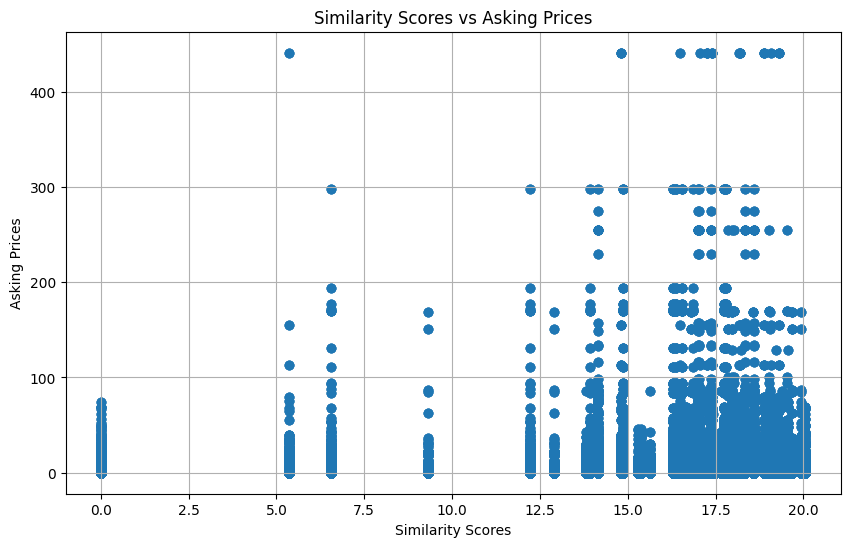

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for similarity scores vs asking prices
plt.figure(figsize=(10, 6))
plt.scatter(similarity_scores_filtered, asking_prices_filtered, alpha=0.5)
plt.title('Similarity Scores vs Asking Prices')
plt.xlabel('Similarity Scores')
plt.ylabel('Asking Prices')
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats import pearsonr

# Step 4: Additional analysis - Investigate CountryCode and osAndVersion features
sql_query_additional = '''
SELECT
    "countryCode",
    "osAndVersion",
    "sentPrice"
FROM
    auctions;
'''

with engine.connect() as db_con:
    additional_df = pd.read_sql(sql_query_additional, con=db_con)

additional_df.head()

,countryCode,osAndVersion,sentPrice
0,US,Android-4.0,0.06
1,ZA,Android-4.0,0.16
2,BR,Android-10.0,0.06
3,IQ,Android-9.0,0.05
4,US,Android-4.0,0.03


In [13]:
# Step 5: Data Preparation

# Check for missing values
missing_values = additional_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check data types
data_types = additional_df.dtypes
print("\nData Types:")
print(data_types)

Missing Values:
countryCode     0
osAndVersion    0
sentPrice       0
dtype: int64

Data Types:
countryCode      object
osAndVersion     object
sentPrice       float64
dtype: object


In [14]:
# Step 6: Statistical analysis - Correlation analysis for "countryCode"
# Convert "countryCode" column to numerical representation using one-hot encoding
additional_df_encoded = pd.get_dummies(additional_df, columns=['countryCode', 'osAndVersion'], drop_first=True)

# Calculate Pearson correlation coefficient between "countryCode" and "sentPrice"
correlation_coefficient_country = additional_df_encoded.corr()['sentPrice'].drop('sentPrice')

print("Pearson correlation coefficient for countryCode:")
print(correlation_coefficient_country)

Pearson correlation coefficient for countryCode:
countryCode_AE            -0.001869
countryCode_AF            -0.002111
countryCode_AL            -0.004894
countryCode_AM            -0.003535
countryCode_AO            -0.002526
                             ...   
osAndVersion_iOS-15.4      0.006170
osAndVersion_iOS-15.4.1    0.014398
osAndVersion_iOS-15.5      0.060628
osAndVersion_iOS-15.6      0.002130
osAndVersion_iOS-16.0      0.005904
Name: sentPrice, Length: 266, dtype: float64


# Results:

#### The previous results hold because the analysis of countryCode and osAndVersion features also indicates a lack of strong correlation with auction prices. This reinforces the earlier finding that there is no strong evidence suggesting that similar apps will consistently go for similar prices in auctions.

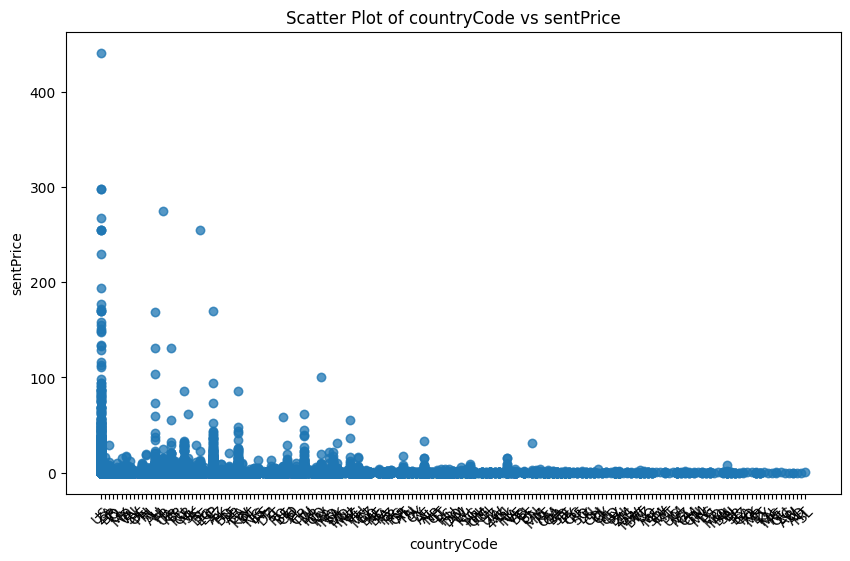

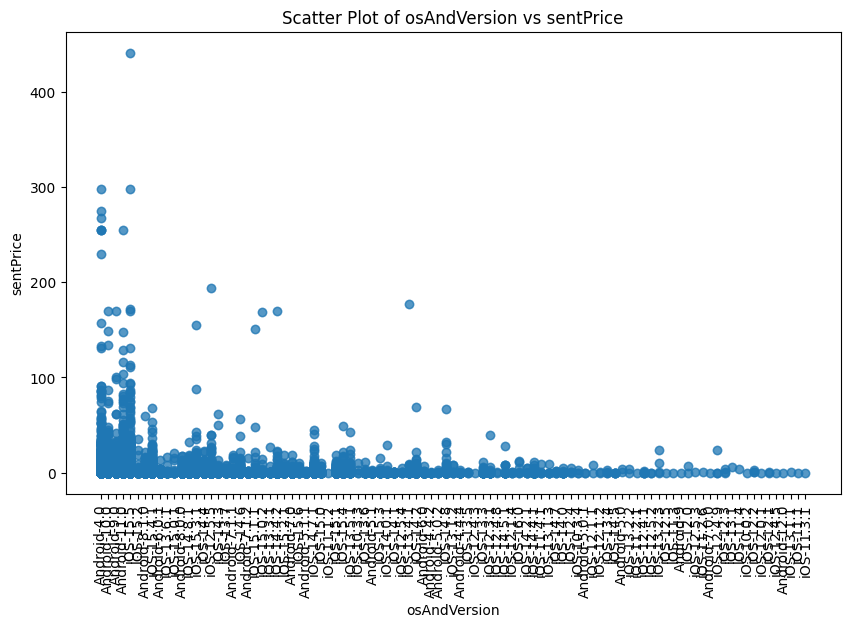

In [16]:
import matplotlib.pyplot as plt

# Scatter plot for countryCode vs sentPrice
plt.figure(figsize=(10, 6))
plt.scatter(additional_df['countryCode'], additional_df['sentPrice'], alpha=0.5)
plt.title('Scatter Plot of countryCode vs sentPrice')
plt.xlabel('countryCode')
plt.ylabel('sentPrice')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for osAndVersion vs sentPrice
plt.figure(figsize=(10, 6))
plt.scatter(additional_df['osAndVersion'], additional_df['sentPrice'], alpha=0.5)
plt.title('Scatter Plot of osAndVersion vs sentPrice')
plt.xlabel('osAndVersion')
plt.ylabel('sentPrice')
plt.xticks(rotation=90)
plt.show()